импорты

In [1]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import pandas as pd
from scipy import signal

константы

In [2]:
# 153.8336486816406250 884.2712384333286764    измеряемый диапазон. 0-2136 диапазон данных
start_nm = 475  # нм
end_nm = 700  # нм

x = pd.read_excel("x points nm.xlsx")
x = np.array(x["nm"].values[1 : len(x) - 1])


def nm_to_x(nm):
    return xint.index(nm) + 1


def x_to_nm(index):
    return x[index]


# номера точек в массиве по координате х
for i in range(len(x)):
    if x[i] > start_nm:
        start_x = i
        break
for i in range(len(x) - 1, 0, -1):
    if x[i] < end_nm:
        end_x = i
        break
x = x[start_x:end_x]
xint = list(np.array(x, dtype=int))
tail_x = nm_to_x(650)
head_x = nm_to_x(475)

функции получения данных

In [3]:
def get_data_rmr(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = re.split(",", spec.read())
            _data.append(np.array(spec[start_x:end_x], dtype=float))
    #    _data.append(get_rmr(spec))
    return _data

получение данных из rmr

In [4]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []  # изанчальные графики
data = []  # сглаженные графики
smooth = True
main_folder = r"C:\Users\user\Desktop\prog\spec-line3\points"
main_folder = main_folder.replace(chr(92), "/")
folders_list = list(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)


for i in range(len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    # print("data from " + str(folders_list[i]) + " recived")
print("получено " + str(len(data_row)) + " папок")

if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()

C:/Users/user/Desktop/prog/spec-line3/points
['step 0', 'step 1', 'step 2', 'step 4', 'step 6', 'step 10', 'step 11', 'step 13', 'step 16', 'step 18', 'step 19', 'step 21', 'step 22', 'step 23', 'step 24']
получено 15 папок


добавить 1 папку

In [4]:
data = []
data_row = []
folders_list = []

In [16]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
smooth = True
main_folder = r"C:\Users\user\Desktop\к5"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.append(folders_list, main_folder[-8:])
print(main_folder)
print(folders_list)


data_row.append(get_data_rmr(main_folder + "/"))
# print("data from " + str(folders_list[i]) + " recived")
print("получено " + str(len(data_row)) + " папок")

if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()

C:/Users/user/Desktop/к5
['капелька' 'пелька 2' 'sktop/к5']
получено 3 папок


функции выборки максимума и разницы

In [5]:
# функции для получения данных
def dmax(mas: np.array):
    return np.max(mas)


def dmax_650(mas: np.array):
    return np.max(mas) - mas[tail_x]


def dmax_list(mas: list):
    _max = []
    for a in mas:
        _max.append(np.max(a))
    return _max


def dmax_650_list(mas: list):
    _max = []
    for i in range(len(mas)):
        _max.append(np.max(mas[i]) - mas[i][tail_x])
    return _max

таймлайн

In [6]:
def zero_index(mas):
    _zero = []
    for i in range(len(mas)):
        if np.max(mas[i]) < 0.1:
            _zero.append(i)
    return _zero

In [7]:
print(folders_list)

['step 0', 'step 1', 'step 2', 'step 3', 'step 4', 'step 5', 'step 6', 'step 7', 'step 8', 'step 9', 'step 10', 'step 11', 'step 12', 'step 13', 'step 14', 'step 15', 'step 16', 'step 17', 'step 18', 'step 19', 'step 20', 'step 21', 'step 22', 'step 23', 'step 24', 'step 25']


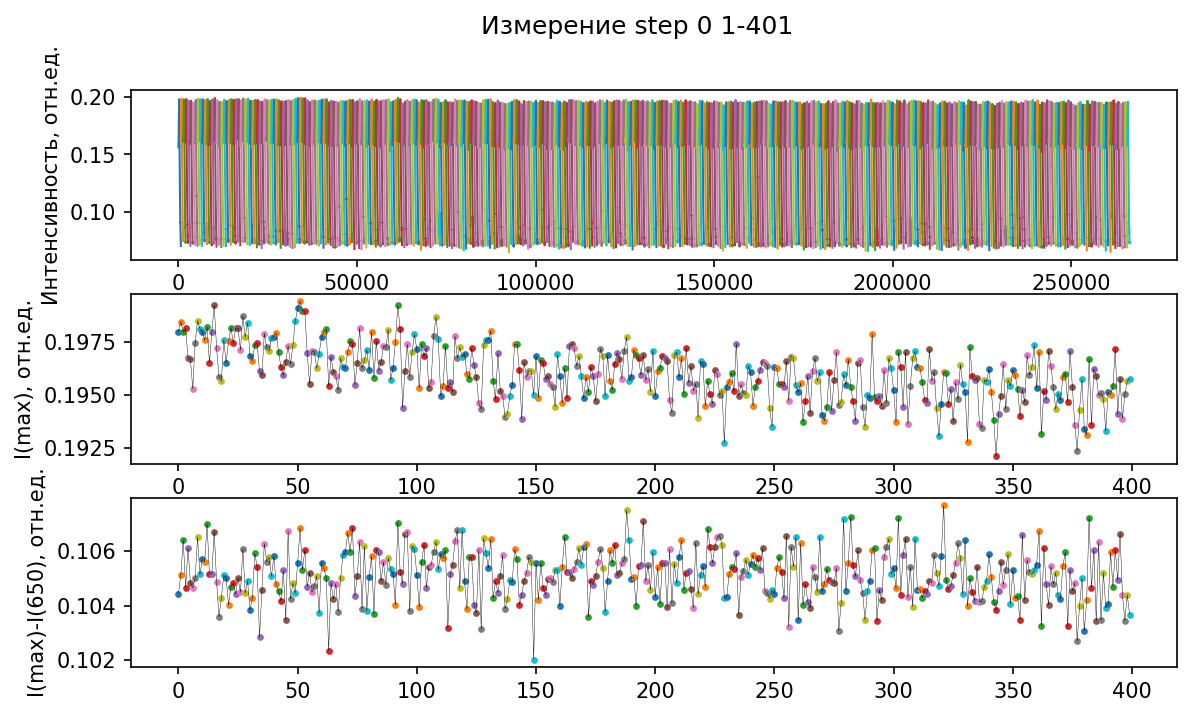

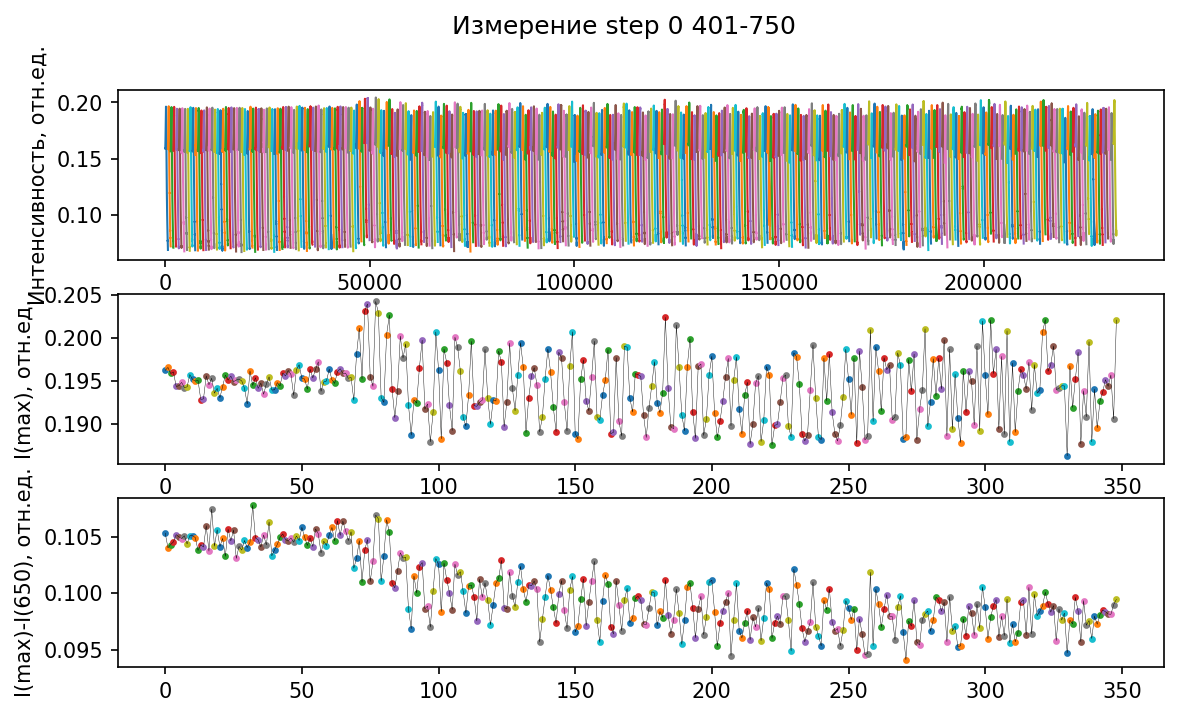

In [7]:
_folder = 0
_a = 400
print_grafs = False
k = len(data[_folder])
if k > 800:
    k = 801
_num = 0
for _b in range(1, k, _a):

    if len(data[_folder]) < _b + _a:
        _a = len(data[_folder]) - _b
    _mas = data[_folder][_b : _b + _a]  # 100 cпектров из папки
    # for i in range(len(_mas)):
    #    _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(9, 5), dpi=150)

    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle(
        "Измерение " + str(folders_list[_folder]) + " " + str(_b) + "-" + str(_b + _a)
    )

    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(_mas[i])
    # axs[0].set_ylim(-0.05, 0.5)
    axs[0].set_ylabel("Интенсивность, отн.ед.")
    # axs[0].set_xticklabels(np.arange(0,_sp),np.arange(0,30))
    # axs[0].axes.tick_params(axis='x',which='minor',direction='out',bottom=True,length=80)

    axs[1].set_ylabel("I(max), отн.ед.")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i], s=5)
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")

    axs[2].set_ylabel("I(max)-I(650), отн.ед.")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i], s=5)
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    if print_grafs == True:
        plt.savefig("timeline/" + str(folders_list[_folder]) + " " + str(_num) + ".png")
    _num += 1

# fig.clf();fig.clear()

выборка лучших спектров

In [6]:
def data_for_hist(mas, ind):
    ar = np.zeros(len(mas))
    if ind == "max":
        for i in range(len(mas)):
            ar[i] = np.max(mas[i])
    else:
        for i in range(len(mas)):
            ar[i] = mas[i][ind]
    return ar


data_new = []
gap = 0.05
for n in range(len(folders_list)):
    masiv = data[n]
    _d = []
    ar_max = data_for_hist(masiv, "max")
    ar_mean = data_for_hist(masiv, tail_x)
    ar_max_mean = ar_max - ar_mean

    maximum = np.max(ar_max_mean)
    ar = []  # индексы спектров с наибольшей разницей между мах и 650
    for i in range(len(ar_max_mean)):
        if ar_max_mean[i] > maximum - gap:
            ar.append(i)
    # if len(ar) == 0:
    # continue
    ar2 = []  # значения интенсивнотей в точке max
    for i in range(len(ar)):
        ar2.append(np.max(masiv[ar[i]]))
    minimum = np.min(ar2)

    ar3 = []  # индексы более подходящих спектров
    for i in range(len(ar)):
        if np.max(masiv[ar[i]]) < minimum + gap:
            ar3.append(ar[i])
    for i in range(len(ar3)):
        _d.append(masiv[ar3[i]])
    data_new.append(_d)

In [7]:
spec = []  # сглаженный
spec_row = []  # не сглаженный


for i in range(len(data_new)):
    _a = len(data_new[i])

    _b = np.sum(data_new[i], axis=0)

    _b /= _a

    spec.append(signal.savgol_filter(_b, 100, 3))
    spec_row.append(_b)

построение лучших спектров

In [10]:
import matplotlib as mpl

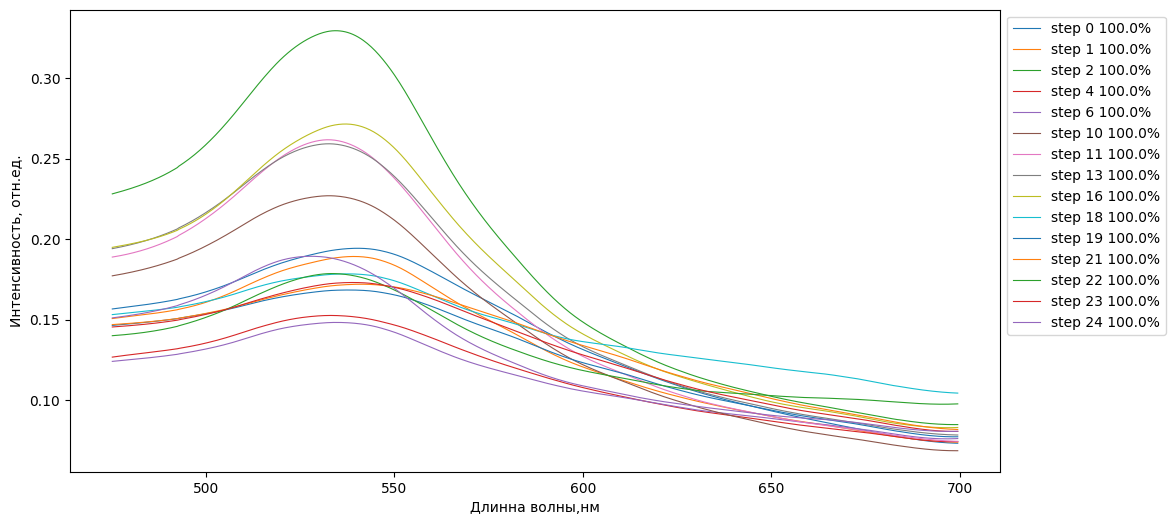

In [8]:
# построение красивых итоговых графиков
plt.figure(figsize=(12, 6))
k = 0
for n in range(len(spec)):

    plt.plot(
        x,
        spec[k],
        lw=0.8,
        label=str(folders_list[k])
        + " "
        + str(round(len(data_new[k]) * 100 / len(data[k]), 2))
        + "%",
    )
    k += 1
plt.xlabel("Длинна волны,нм")
plt.ylabel("Интенсивность, отн.ед.")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("отобранные графики.png")

C:\Users\user\AppData\Local\Temp\ipykernel_8564\3311240144.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


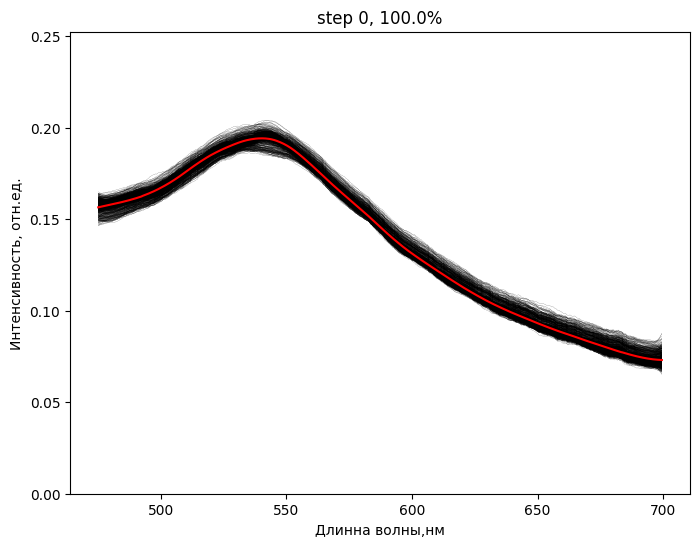

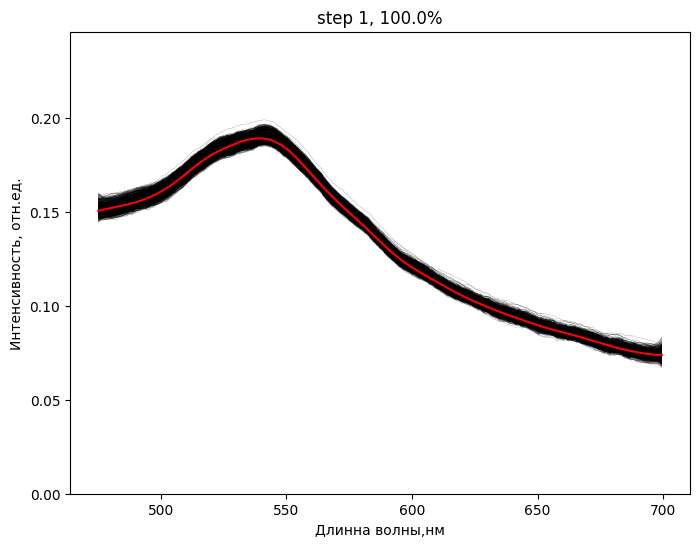

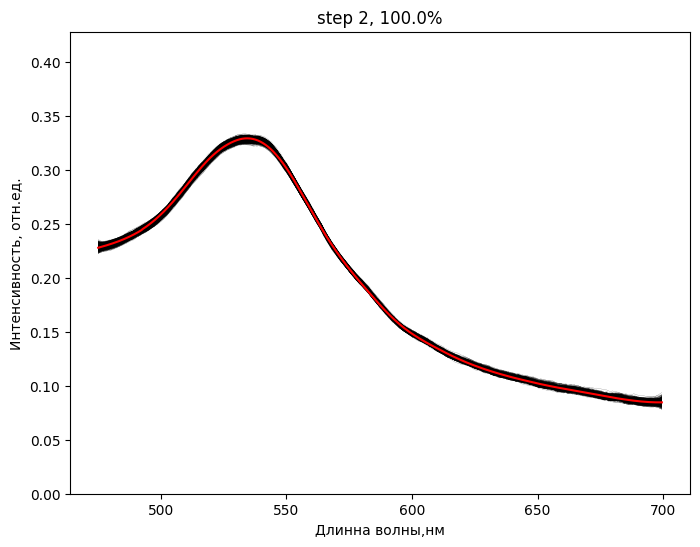

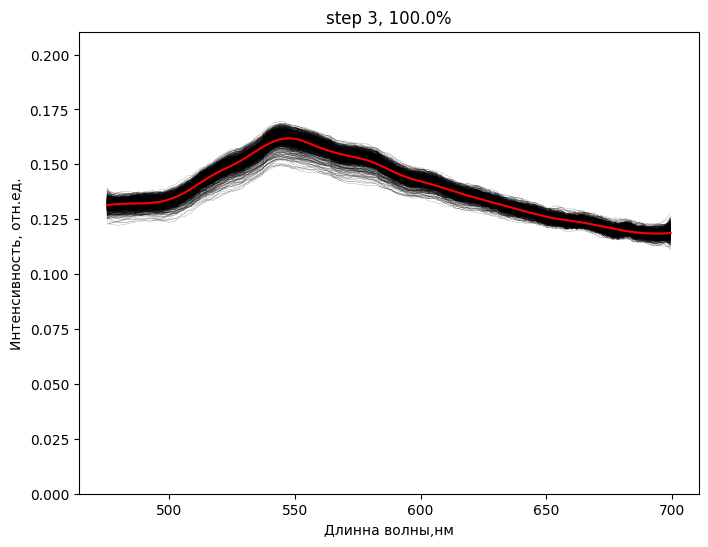

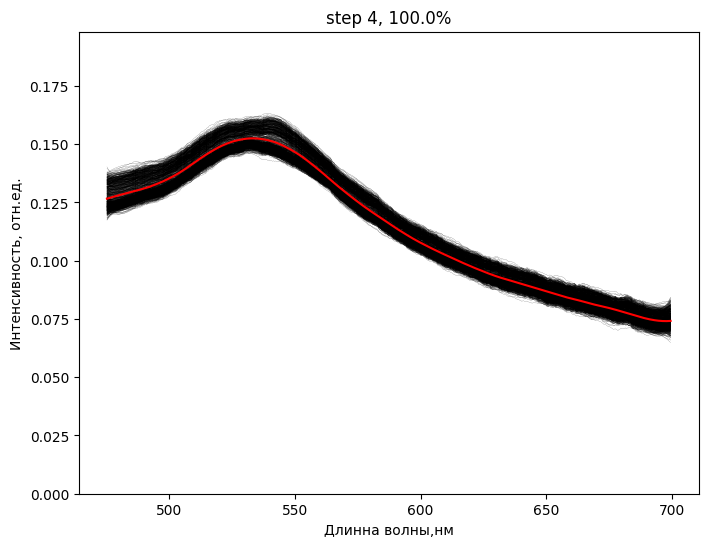

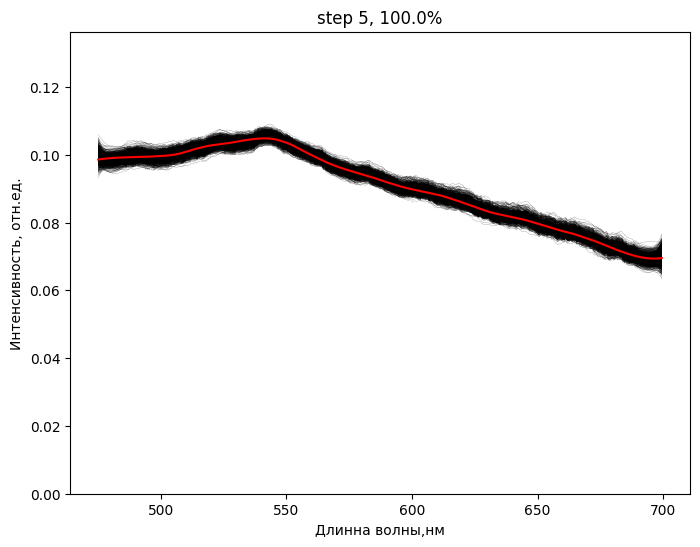

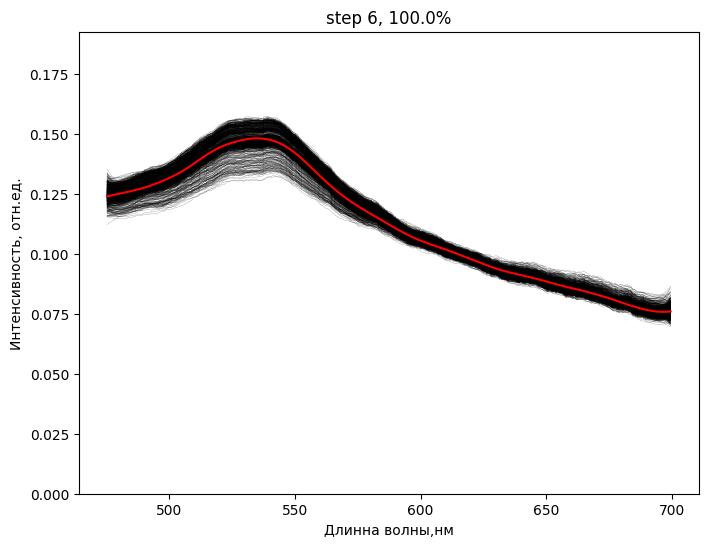

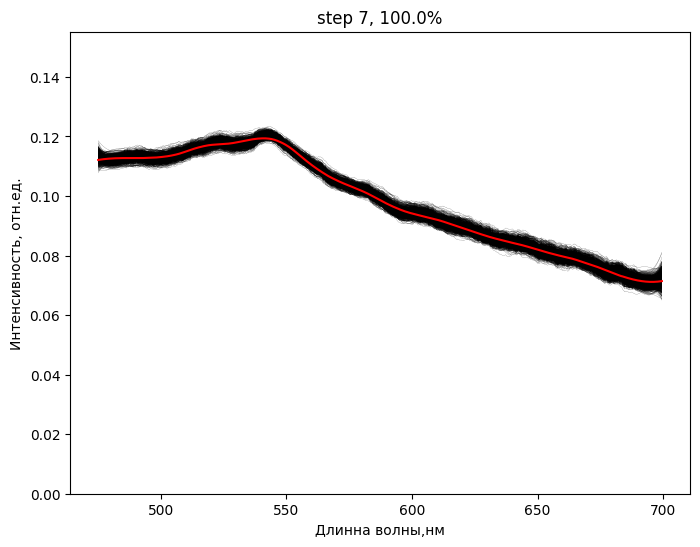

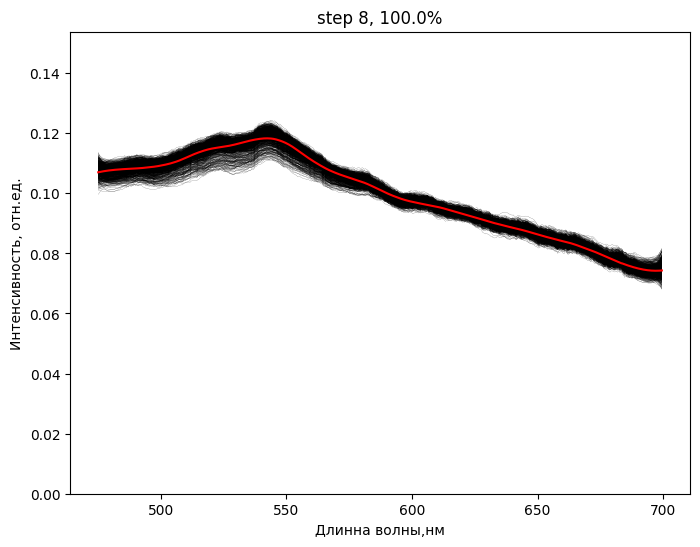

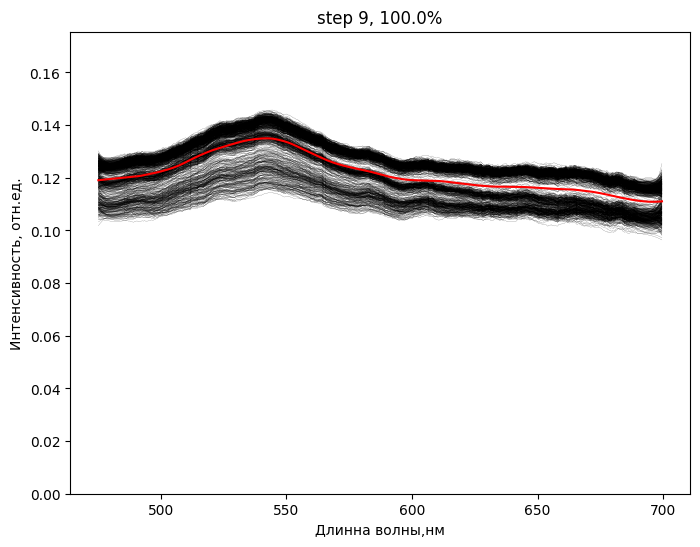

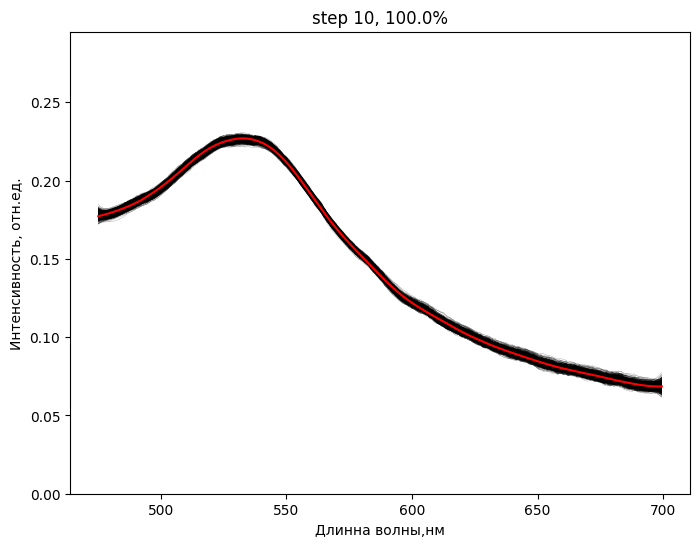

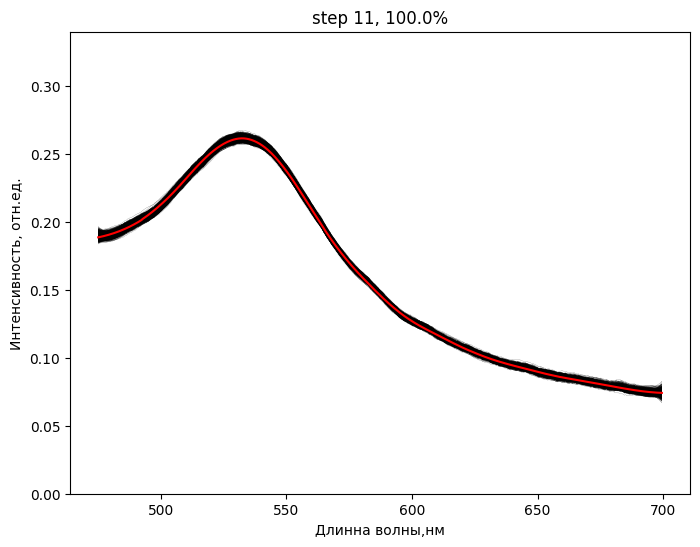

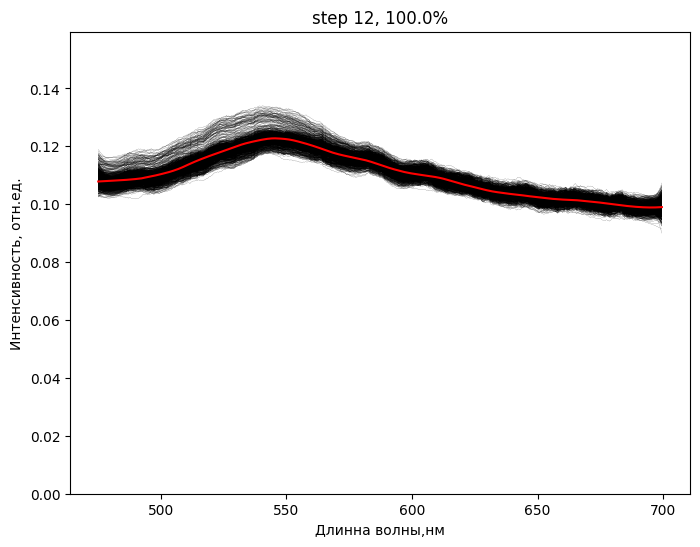

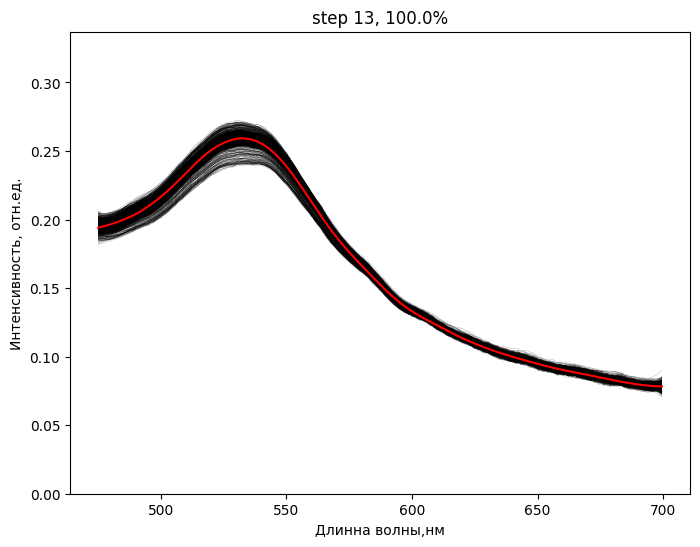

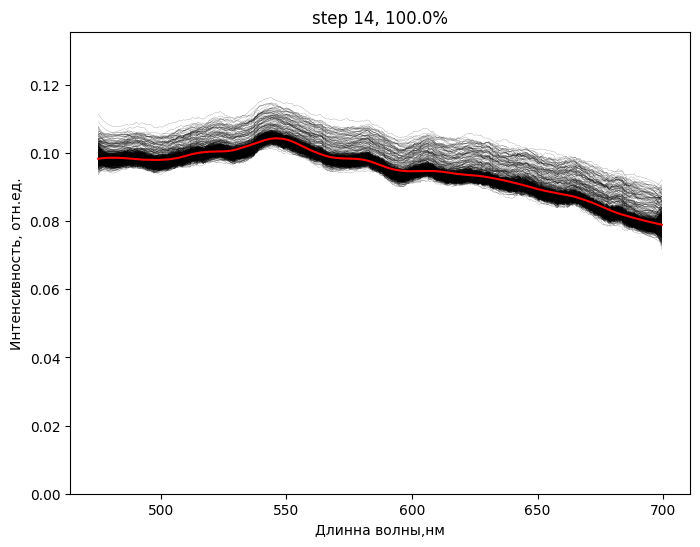

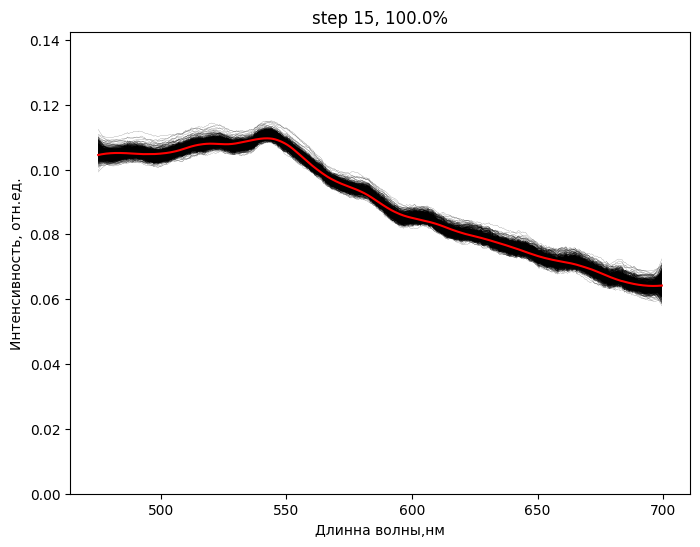

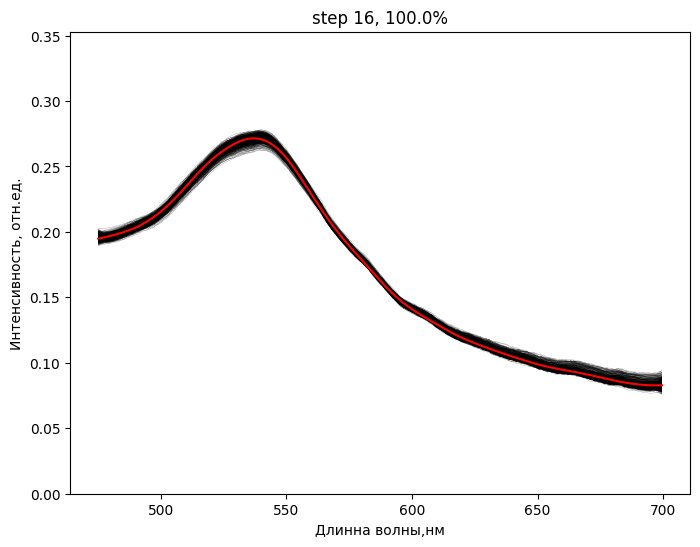

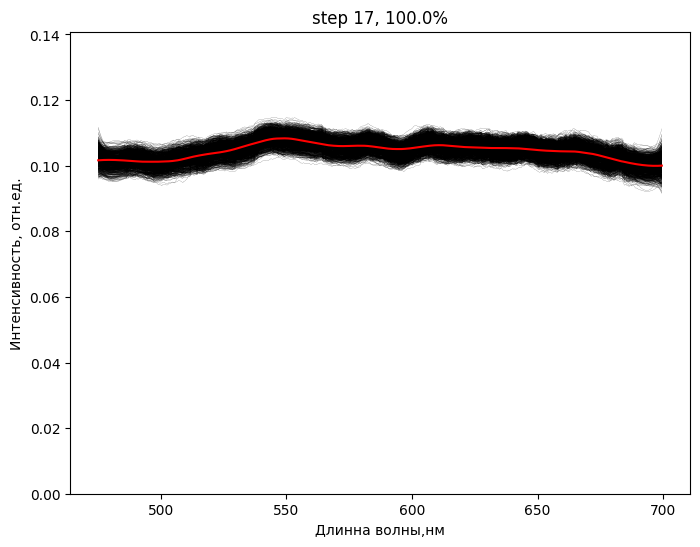

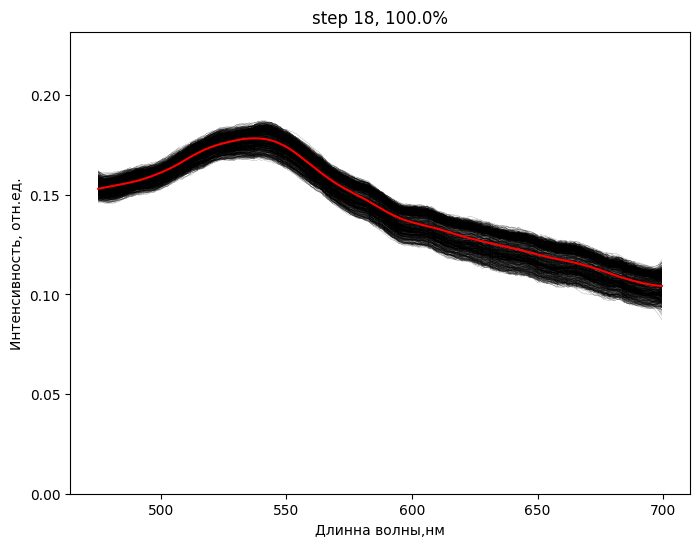

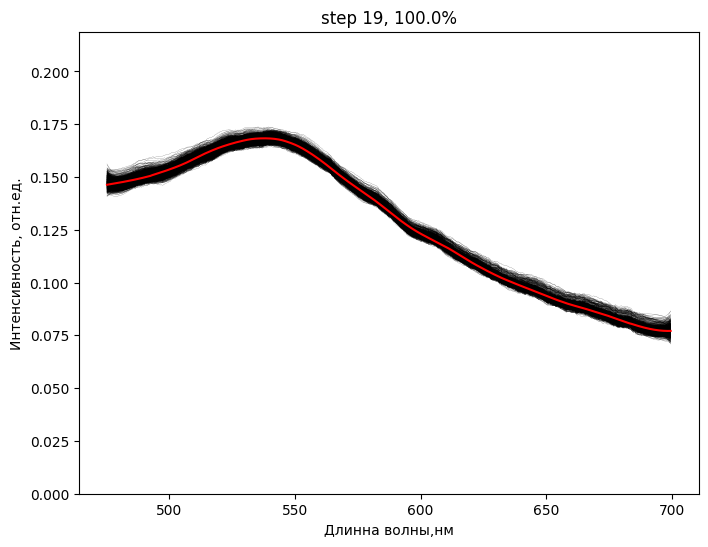

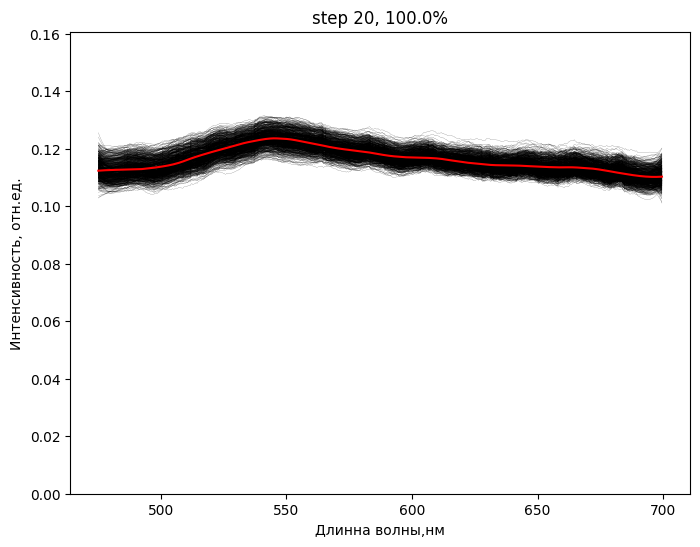

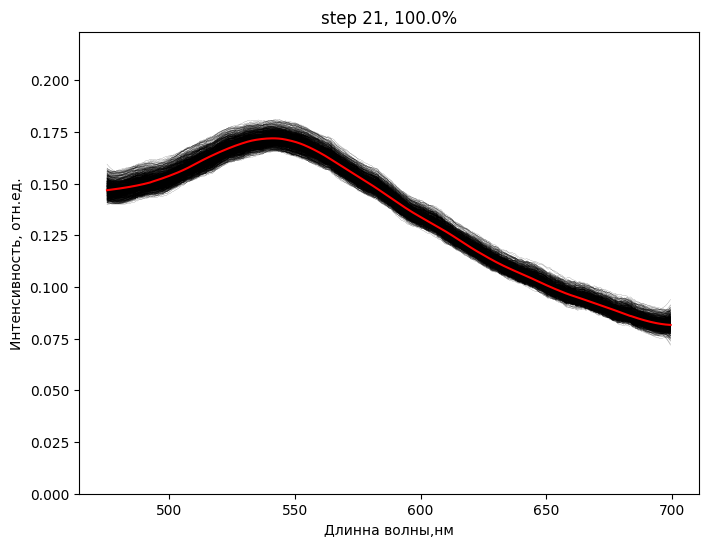

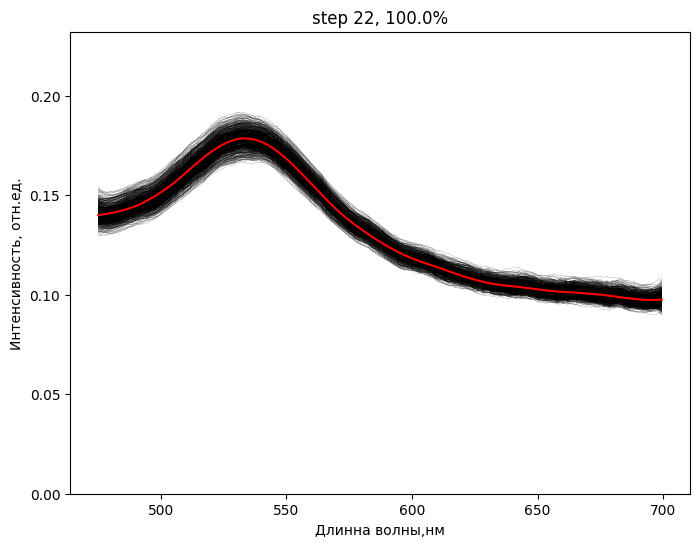

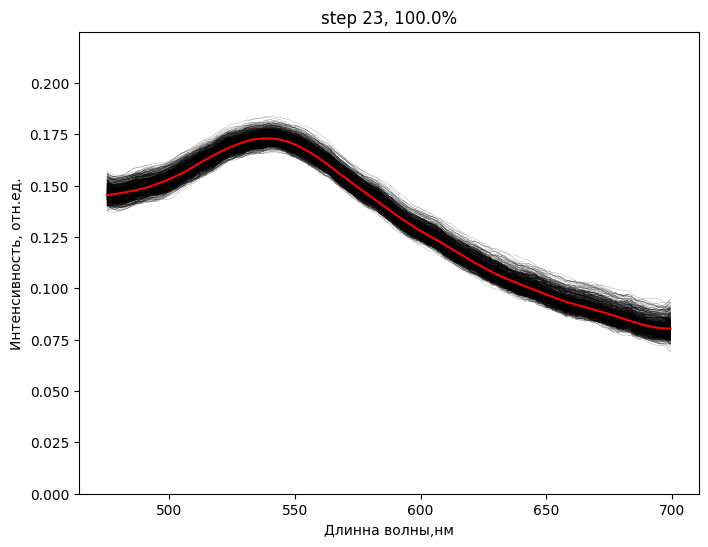

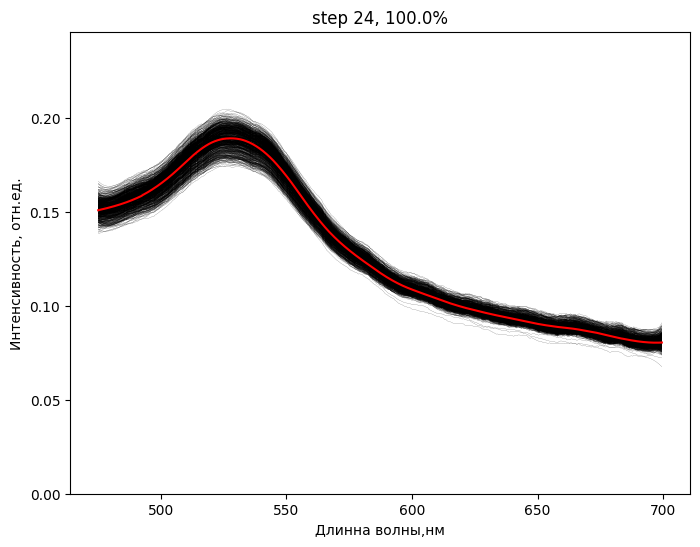

In [12]:
for n in range(len(spec)):
    plt.figure(figsize=(8, 6))
    for i in range(len(data[n])):
        plt.plot(
            x,
            data[n][i],
            lw=0.1,
            color="black",
        )
    plt.plot(x, spec[n], color="red")
    plt.title(
        folders_list[n]
        + ", "
        + str(round(len(data_new[n]) * 100 / len(data[n]), 2))
        + "%"
    )
    plt.ylim(0, 1.3 * np.max(spec[n]))
    plt.xlabel("Длинна волны,нм")
    plt.ylabel("Интенсивность, отн.ед.")
    plt.savefig("sp/" + str(folders_list[n]) + ".png")

In [12]:
spec = spec[1 : len(spec)]

дескрипторы

In [9]:
def coef_parabola(sp):
    """коэффициенты параболы"""
    _m = np.max(sp)
    _gap = 0.005
    _i = np.argmax(sp)
    if _i == 0:
        return [0]
    _p, _q = 0, 0
    for i in range(_i, _i + 300):
        if sp[i] < _m - _gap:
            _q = i
            break
    for i in range(_i, _i - 300, -1):
        if sp[i] < _m - _gap:
            _p = i

            break

    _coefs = np.polyfit(
        x[_p:_q], sp[_p:_q], 2
    )  # Вторым аргументом передается степень полинома
    return _coefs


def w_h_75(sp):
    """ширина, высота"""
    _h = np.max(sp) - (np.max(sp) - np.min(sp[0 : round(len(sp) / 3)])) * 0.25
    _start, _end = 0, 0
    _ind_max = np.argmax(sp)
    for i in range(_ind_max, _ind_max + 300):
        if sp[i] <= _h:
            _end = i
            break
    for i in range(_ind_max, _ind_max - 300, -1):
        if sp[i] <= _h:
            _start = i
            break
    _w = x_to_nm(_end) - x_to_nm(_start)
    return (_w, _h)


def angle(sp, point):
    _x1 = x_to_nm(np.argmax(sp))
    _y1 = np.max(sp)
    _x2 = point
    _y2 = sp[nm_to_x(point)]
    return (_y2 - _y1) / (_x2 - _x1)

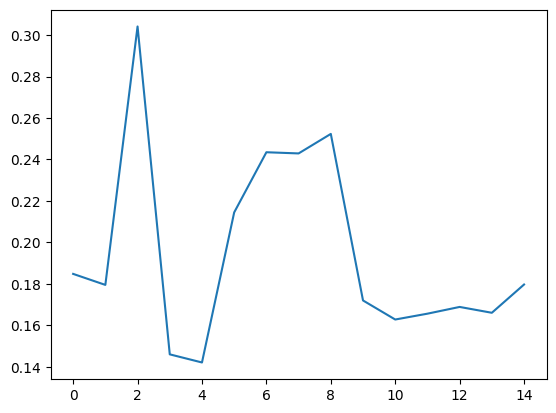

In [10]:
# выбор максимума
S_name = pd.Series(folders_list)
S_Imax = pd.Series(name="I(max)")
S_NMmax = pd.Series(name="I nm")
S_I650 = pd.Series(name="I(650)")
S_Imax_m_I650 = pd.Series(name="I(max)-I(650)")
S_I400 = pd.Series(name="I(400)")
S_Imax_m_I400 = pd.Series(name="I(max)-I(400)")
S_coef_a = pd.Series(name="coef A")
S_height = pd.Series(name="height")
S_weight = pd.Series(name="weight")
S_angle = pd.Series(name="ang")
_sp = nm_to_x(475)
for i in range(len(spec)):
    S_Imax.loc[i] = np.max(spec[i])
    S_NMmax.loc[i] = x[np.argmax(spec[i])]
    S_I650.loc[i] = spec[i][tail_x]
    S_Imax_m_I650.loc[i] = S_Imax.loc[i] - S_I650.loc[i]
    S_I400.loc[i] = spec[i][_sp]
    S_Imax_m_I400.loc[i] = S_Imax.loc[i] / S_I400.loc[i]
    S_coef_a.loc[i] = coef_parabola(spec[i])[0]
    _w_h = w_h_75(spec[i])
    S_height.loc[i] = _w_h[0]
    S_weight.loc[i] = _w_h[1]
    S_angle.loc[i] = angle(spec[i], 570)
plt.plot(np.arange(len(S_weight)), S_weight)

In [ ]:
# построение параболы и кучи линий
n = 0


ind = x_to_nm(np.argmax(spec[n]))
max = np.max(spec[n])


mean = spec[n][nm_to_x(650)]


plt.plot((ind, ind), (0, max), color="blue")
q = 0.75


def h(_max, _650, coe):
    return _max - coe * (_max - _650)


def o(sp):
    return np.max(sp) - (np.max(sp) - np.min(sp[0 : round(len(sp) / 3)])) * 0.25


parabola = np.poly1d(coef_parabola(spec[n]))


plt.title("измерение " + str(folders_list[n]))
plt.plot((400, 600), (max * q, max * q), label="0.75*I(max")
plt.plot((400, 600), (max * 0.5, max * 0.5), label="0.5*I(max")


plt.plot(
    (400, 600),
    (h(max, mean, 0.25), h(max, mean, 0.25)),
    label="0.75*I(max) вычет I(650)",
)
plt.plot((400, 600), (o(spec[n]), o(spec[n])), label="верхняя")


plt.plot(
    (400, 600), (h(max, mean, 0.5), h(max, mean, 0.5)), label="0.5*I(max) вычет I(650)"
)


plt.plot(x[100:500], parabola(x[100:500]), label="Аппроксимация")


plt.plot(x, spec[n], color="black")


plt.ylim(mean * 0.9, max * 1.1)


plt.legend()

построение карт

In [11]:
import sys

sys.path.append(r"C:\Users\user\Desktop\prog\spec-line3\pfy")
from pyfitit import *
import pandas as pd

In [15]:
data_speed = pd.read_excel("speed2.xlsx")
data_measure = pd.concat(
    [
        S_Imax,
        S_NMmax,
        S_I650,
        S_Imax_m_I650,
        S_I400,
        S_Imax_m_I400,
        S_coef_a,
        S_height,
        S_weight,
        S_angle,
    ],
    axis=1,
)
data_table = pd.concat([data_speed, data_measure], axis=1)
print(data_table.columns[0:])

Index(['имя', 'v АК', ' v ХЗ', 'v ЦН', 'v М', 'I(max)', 'I nm', 'I(650)',
       'I(max)-I(650)', 'I(400)', 'I(max)-I(400)', 'coef A', 'height',
       'weight', 'ang'],
      dtype='object')


In [ ]:
plt()

In [16]:
data_table.to_excel("output30 сек сосиски2.xlsx", index=False)

In [21]:
data_table1 = data_table.copy()
data_table1["имя"] = data_table1["имя"].astype(str)
sample = Sample(params=data_table1, spectra=spec, energy=x, meta=dict(nameColumn="имя"))
sample.saveToFolder("sample")
descriptor.plot_cv_result(
    sample,
    features=["v АК", " v ХЗ", "v ЦН"],
    label_names=[
        "I(max)",
        "I nm",
        "I(650)",
        "I(max)-I(650)",
        "I(400)",
        "I(max)-I(400)",
        "coef A",
        "height",
        "weight",
        "ang",
    ],
    folder="results/test",
    cv_count=len(spec),
    #repForStdCalc=1,
)

Try predict by: ['v АК', ' v ХЗ', 'v ЦН']
I(max) - regression score: {'R2-score': 0.10361481220697455, 'MAE': 0.03615350985536684, 'MAX': 0.10343249774123686, 'RMSE': 0.04765400124442962, 'R2-score interval': array([-1.56553735,  0.68680775]), 'RMSE interval': array([0.03520224, 0.07375368])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.])}
I nm - regression score: {'R2-score': 0.4075894342173215, 'MAE': 2.2842483333332817, 'MAX': 5.947400000000243, 'RMSE': 2.7030233294945045, 'R2-score interval': array([-0.69553386,  0.79301488]), 'RMSE interval': array([1.99673646, 4.18344548])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.])}
I(650) - regression score: {'R2-score': -1.0661167150221935, 'MAE': 0.0079424520821223, 'MAX': 0.032682539201256466, 'RMSE': 0.012247593839131495, 'R2-score interval': array([-4.91341722,  0.27810974]), 'R

Try predict by: ['v АК', 'v ЦН']
I(max) - regression score: {'R2-score': -0.48862912046186824, 'MAE': 0.04569924572871142, 'MAX': 0.1509191798910795, 'RMSE': 0.06141087583361551, 'R2-score interval': array([-3.26059429,  0.47988085]), 'RMSE interval': array([0.04536451, 0.09504507])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.])}
I nm - regression score: {'R2-score': 0.3849540668057003, 'MAE': 2.2384100000000444, 'MAX': 6.258200000000329, 'RMSE': 2.7541790587517703, 'R2-score interval': array([-0.76031837,  0.7851062 ]), 'RMSE interval': array([2.03452545, 4.26261876])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.])}
I(650) - regression score: {'R2-score': -0.3978035479517852, 'MAE': 0.0060101516208143505, 'MAX': 0.031909477306849204, 'RMSE': 0.010073871789616669, 'R2-score interval': array([-3.00064309,  0.51161483]), 'RMSE in

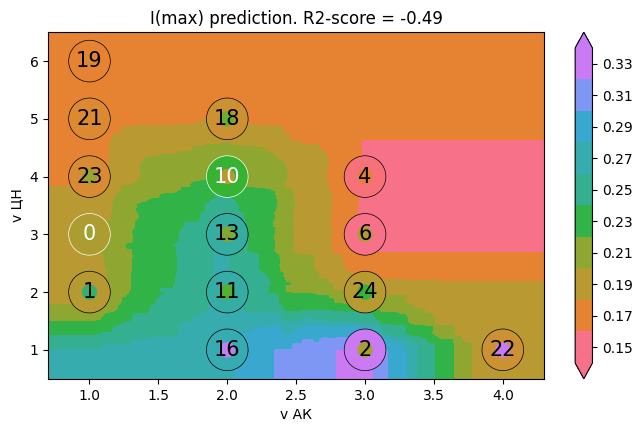

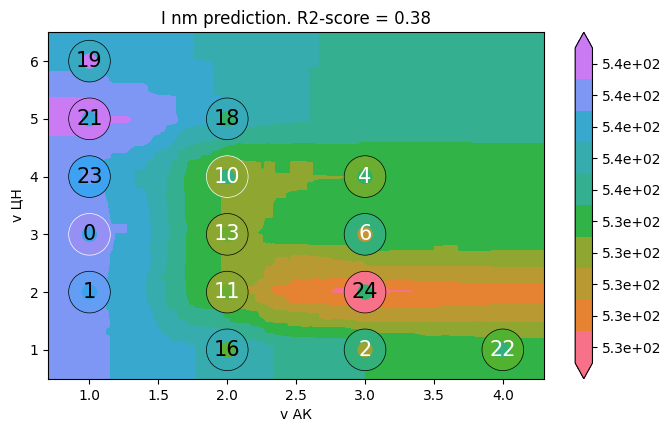

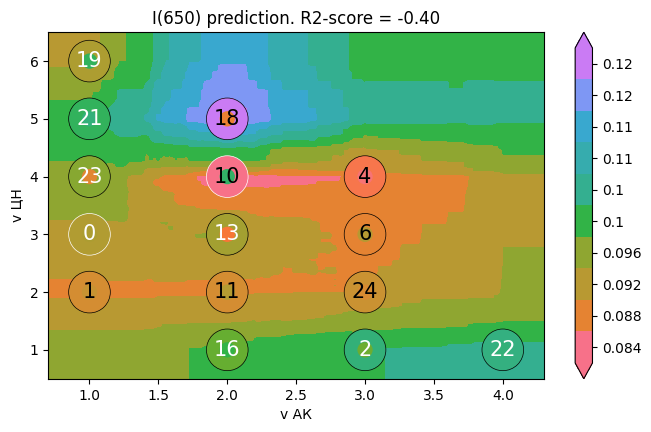

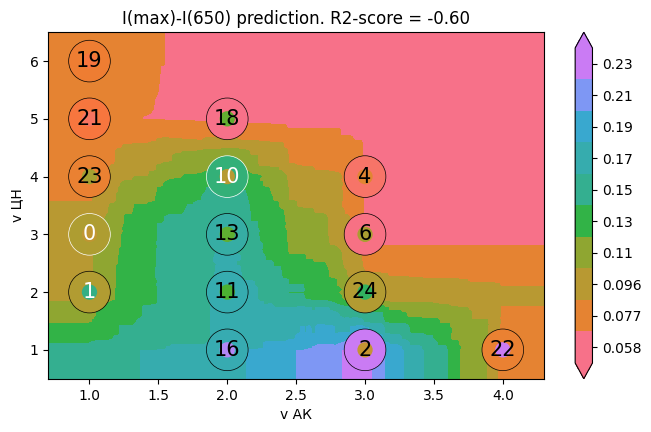

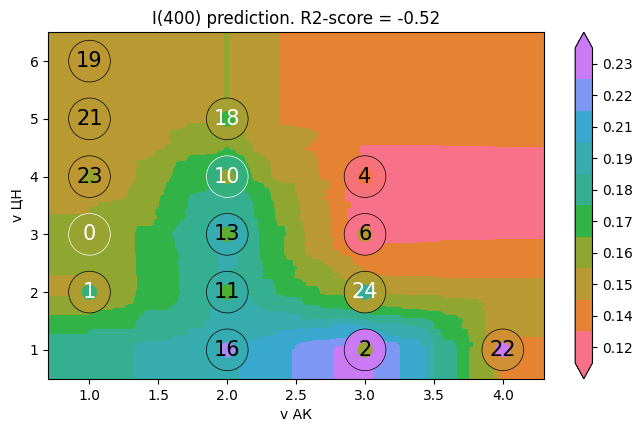

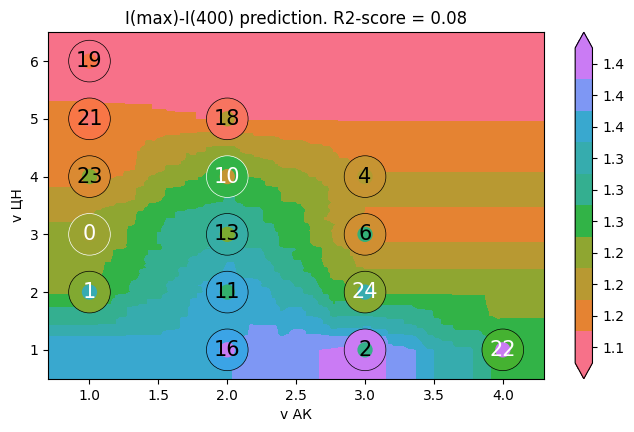

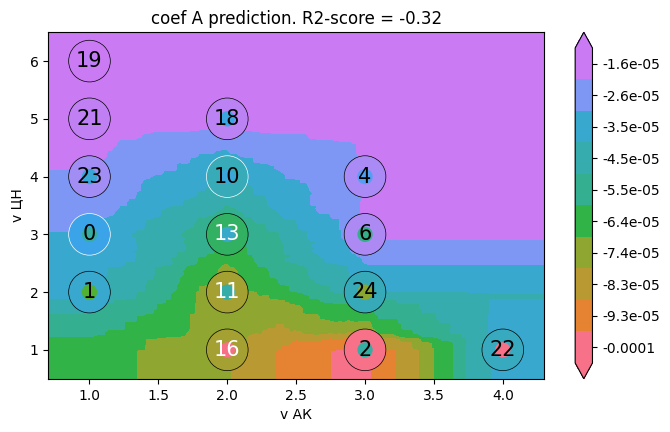

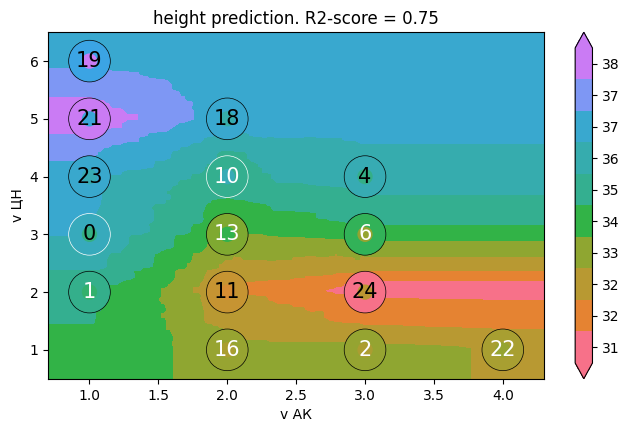

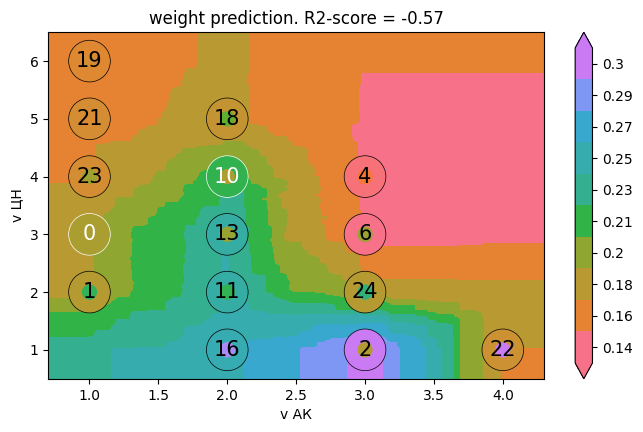

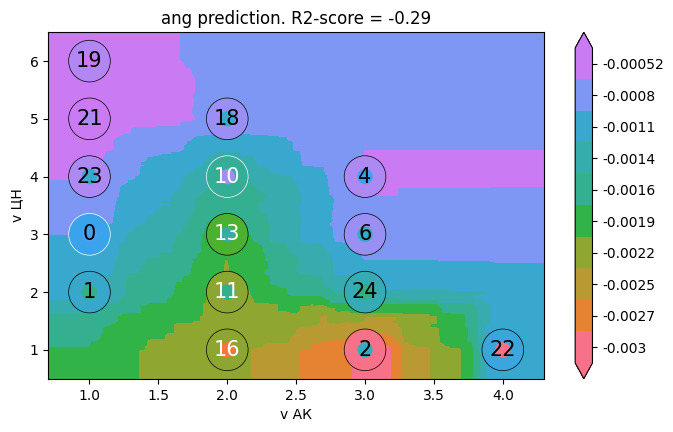

In [20]:
# 2D КАРТЫ
import sklearn

plotDescriptors2d(
    data_table,
    descriptorNames=["v АК", "v ЦН"],
    # labelNames=data_table.columns[5:],
    labelNames=[
        "I(max)",
        "I nm",
        "I(650)",
        "I(max)-I(650)",
        "I(400)",
        "I(max)-I(400)",
        "coef A",
        "height",
        "weight",
        "ang",
    ],
    textColumn=data_table.columns[0],
    cv_count=15,
    # unknown="unknown.params",
    folder_prefix="results/descriptors2",
    # model_regr=sklearn.linear_model.RidgeCV(),
)